# AE4465 (MM&A) - Bathtub curve

The bathtub curve is widely used in reliability engineering and deterioration modeling. It describes a particular form of the hazard function which comprises three parts:

- The first part is a decreasing failure rate, known as early failures.
- The second part is a constant failure rate, known as random failures.
- The third part is an increasing failure rate, known as wear-out failures.

The name is derived from the cross-sectional shape of a bathtub: steep sides and a flat bottom. In this tutorial you will learn how to simulate a bathtub curve with Weibull distributions.

**Note:** While the bathtub curve is useful, not every system follows a bathtub curve hazard function;

### How to simulate the bathtub curve

The Weibull distribution per se can not capture the bathtub curve. To do so, you need to capture each part of the lifetime of the equipment with a different curve.

In [2]:
# import the libraries
import pandas as pd
import numpy as np
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
import matplotlib.pyplot as plt
import numpy as np

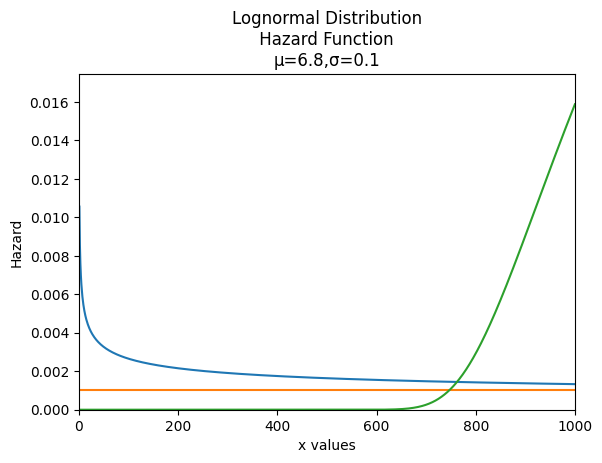

In [3]:
#Creating the three periods of reliability: infant mortality, random failure and wear out
xvals = np.linspace(0,1000,1000)
infant_mortality = Weibull_Distribution(alpha=400,beta=0.7).HF(xvals=xvals,label='infant mortality [Weibull]')
random_failures = Exponential_Distribution(Lambda=0.001).HF(xvals=xvals,label='random failures [Exponential]')
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1).HF(xvals=xvals,label='wear out [Lognormal]')
combined = infant_mortality+random_failures+wear_out

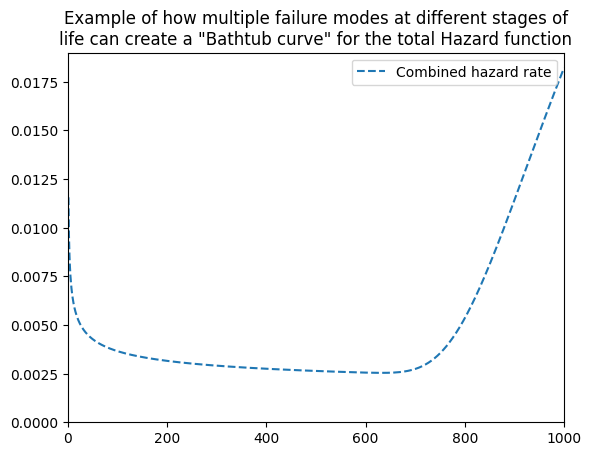

In [4]:
plt.plot(xvals,combined,linestyle='--',label='Combined hazard rate')
plt.legend()
plt.title('Example of how multiple failure modes at different stages of\nlife can create a "Bathtub curve" for the total Hazard function')
plt.xlim(0,1000)
plt.ylim(bottom=0)
plt.show()

### Word of caution

It is important to understand that despite its well known name, the bathtub shape is actually more uncommon than its reputation. A series of studies have analysed the failure patterns and found that there are six characteristic failure patterns. Of all equipment analysed, just 4% were found to exhibit a bathtub curve, and only 11% showed evidence of wear out (failure modes A,B,C).

 &nbsp;
<center><img text-align="center" alt="RCM curves" src="imgs//reliability_curves.jpeg" width="600"/></center>